<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Curso-Dominando-Data-Science---Flai/blob/main/Combina%C3%A7%C3%A3o_de_Modelos_Flai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cobinação de Modelos**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv')

In [3]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dados.smoker = dados.smoker.map({'yes': 1, 'no': 0})
dados.charges = dados.charges/1000
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16.884924
1,18,male,33.770,1,0,southeast,1.725552
2,28,male,33.000,3,0,southeast,4.449462
3,33,male,22.705,0,0,northwest,21.984471
4,32,male,28.880,0,0,northwest,3.866855


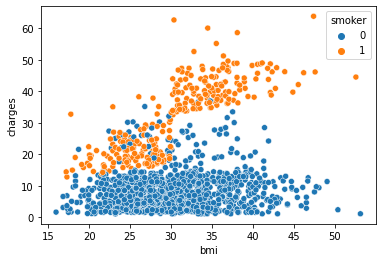

In [7]:
sns.scatterplot(x='bmi',y='charges', hue='smoker', data=dados)

In [14]:
X= dados[['bmi', 'charges']]
y = dados['smoker']

# **Validação Cruzada**

In [12]:
from sklearn.model_selection import KFold, cross_val_score

In [16]:
kf= KFold(n_splits=50, shuffle=True)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Regressão Logística**

In [17]:
log_model = LogisticRegression()
log_acc = cross_val_score(log_model, X, y, cv=kf, scoring='accuracy')
log_acc = log_acc.mean()
print(log_acc)

0.9326780626780625


## **KNN**

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_acc = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')
knn_acc = knn_acc.mean()
print(knn_acc)

0.9641310541310539


## **Decision Tree**

In [19]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_acc = cross_val_score(tree_model, X, y, cv=kf, scoring='accuracy')
tree_acc = tree_acc.mean()
print(tree_acc)

0.9635042735042735


# **Combinação por Votos**

*Two heads, they say, is better than one. Sometimes in many Machine Learning projects we want to make use of the power of synergy using ensemble methods. The voting and the stacking classifier brings us the benefit of combining 2 or more machine learning models for higher predictive performance* [Ensemble Methods: Comparing Scikit Learn’s Voting Classifier to The Stacking Classifier](https://towardsdatascience.com/ensemble-methods-comparing-scikit-learns-voting-classifier-to-the-stacking-classifier-f5ab1ed1a29d)


*Suppose you are a part of a decision panel and every member of the panel comes with a decision about something. The panel does the voting among them and reaches to the final decision. How do they come to it? Simple they use the mode of the all member’s vote.* [Enhancing the performance measures by Voting Classifier in ML](https://medium.com/analytics-vidhya/voting-classifier-in-machine-learning-9534504eba39)

*A voting classifier is a classification method that employs multiple classifiers to make predictions. It is very applicable in situations when a data scientist or machine learning engineer is confused about which classification method to use. Therefore, using the predictions from multiple classifiers, the voting classifier makes predictions based on the most frequent one.*"

"If set to hard, the voting classifier will make judgments based on the predictions that appear the most. Otherwise, if set to soft, it will use a weighted approach to make its decision." [How Voting Classifiers Works](https://towardsdatascience.com/how-voting-classifiers-work-f1c8e41d30ff)

[Biblioteca](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)



In [29]:
#Combinação por votos hard em que é escolhido pela maioria, am caso de empate será pela ordem de classificação.

from sklearn.ensemble import VotingClassifier

modelos = [('Reg. Log.',log_model),('KNN',knn_model),
           ('Árvore de Decisão',tree_model)]

vot_model = VotingClassifier(modelos, voting='hard')

vot_acc = cross_val_score(vot_model, X, y, cv=kf, scoring='accuracy')
vot_hard = vot_acc.mean()
print(vot_hard)

0.9634188034188033


In [25]:
#gráfico de Região
from mlxtend.plotting import plot_decision_regions

In [26]:
vot_model.fit(X,y)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                              DecisionTreeC

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


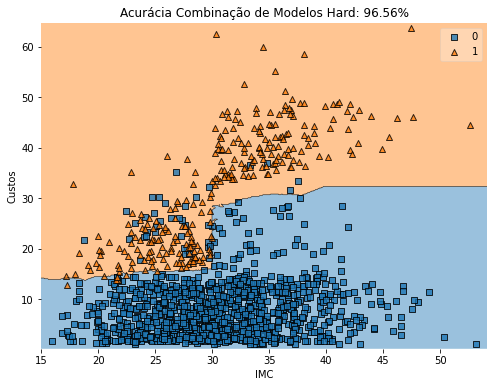

In [27]:
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, clf=vot_model, legend=1)

plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*vot_acc))  
plt.show()

In [30]:
# Combinação por votos 'Soft', escolhido por peso.

from sklearn.ensemble import VotingClassifier

modelos = [('Reg. Log.',log_model),('KNN',knn_model),
           ('Árvore de Decisão',tree_model)]

vot_model = VotingClassifier(modelos, voting='soft')

vot_soft = cross_val_score(vot_model, X, y, cv=kf, scoring='accuracy')
vot_soft = vot_soft.mean()
print(vot_soft)

0.9656695156695156


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


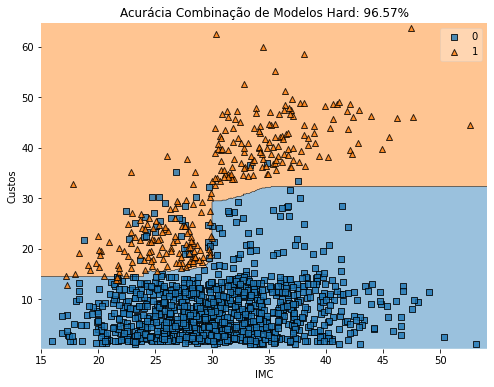

In [32]:
vot_model.fit(X,y)
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, clf=vot_model, legend=1)

plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*vot_soft))  
plt.show()

# **Bagging**

*Bagging uses a simple approach that shows up in statistical analyses again and again — improve the estimate of one by combining the estimates of many. Bagging constructs n classification trees using bootstrap sampling of the training data and then combines their predictions to produce a final meta-prediction.* [Using Bagging and Boosting to Improve Classification Tree Accuracy](https://towardsdatascience.com/using-bagging-and-boosting-to-improve-classification-tree-accuracy-6d3bb6c95e5b)

The idea of "*Bagging is to decrease the model’s variance...
Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. The model created should be less overfitted than a single individual model." [Boosting, Bagging, and Stacking — Ensemble Methods with sklearn and mlens](https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de)

In [35]:
from sklearn.ensemble import BaggingClassifier

modelo_base= LogisticRegression()
modelo_base1 = KNeighborsClassifier(n_neighbors = 17)
modelo_base2 = DecisionTreeClassifier(max_depth = 3)


In [38]:
bagg_model = BaggingClassifier(n_estimators=100, base_estimator=modelo_base2)

bagg_acc= cross_val_score(bagg_model,X,y,cv=kf, scoring='accuracy')
bagg_acc = bagg_acc.mean()
print(bagg_acc)

0.9641880341880342


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


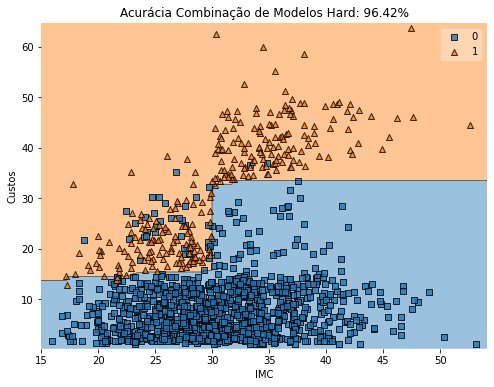

In [39]:

bagg_model.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = bagg_model, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*bagg_acc))  
plt.show()

# **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rand_model = RandomForestClassifier(n_estimators=100, max_depth=5)

rand_acc = cross_val_score(rand_model, X, y, cv = kf, scoring = 'accuracy')
rand_acc = rand_acc.mean()
print(rand_acc)

0.9626495726495727


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


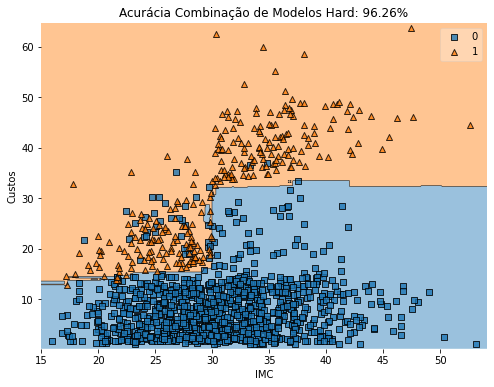

In [41]:
rand_model.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = rand_model, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*rand_acc))  
plt.show()

In [43]:
print(log_acc,knn_acc,tree_acc, vot_hard, vot_soft, bagg_acc, rand_acc, sep='\n')

0.9326780626780625
0.9641310541310539
0.9635042735042735
0.9634188034188033
0.9656695156695156
0.9641880341880342
0.9626495726495727


# **Métricas de Classificação**


##**Validação do Modelo - Quero apenas escolher o melhor modelo ou também saber o seu erro de generalização?**

In [44]:
def MetricasClassBinaria(observado, predito):
    from sklearn.metrics import confusion_matrix
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas

In [45]:
#divide as variáveis em teste e treino
from sklearn.model_selection import train_test_split
import numpy as np

#Fazendo a Divisão em Teste e Treinamento
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.20)

## **Regressão Logística**

In [50]:
log_model = LogisticRegression()
log_model.fit(Xtreino, Ytreino)
preditos = log_model.predict(Xteste)
metricas_log = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9366
             Sensibilidade: 0.7455
            Especificidade: 0.9859
  Valor Preditivo Positivo: 0.9318
  Valor Preditivo Negativo: 0.9375
Coef. de Corr. de Matthews: 0.7974
                  F1-Score: 0.8283
                Eficiência: 0.8657


## **KNN**

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 25)
knn_model.fit(Xtreino, Ytreino)
preditos = knn_model.predict(Xteste)
metricas_knn = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9739
             Sensibilidade: 0.9273
            Especificidade: 0.9859
  Valor Preditivo Positivo: 0.9444
  Valor Preditivo Negativo: 0.9813
Coef. de Corr. de Matthews: 0.9194
                  F1-Score: 0.9358
                Eficiência: 0.9566


## **Decision Tree**

In [52]:
tree_model = DecisionTreeClassifier(max_depth = 3)
tree_model.fit(Xtreino, Ytreino)
preditos = tree_model.predict(Xteste)
metricas_tree = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9813
             Sensibilidade: 0.9455
            Especificidade: 0.9906
  Valor Preditivo Positivo: 0.9630
  Valor Preditivo Negativo: 0.9860
Coef. de Corr. de Matthews: 0.9425
                  F1-Score: 0.9541
                Eficiência: 0.9680


## **Voting Classifier**

In [59]:
#hard
vot_model = VotingClassifier(estimators = [('Reg. Log.', log_model), ('KNN', knn_model), ('Árvore', tree_model)], voting = 'hard')
vot_model.fit(Xtreino, Ytreino)
preditos = vot_model.predict(Xteste)
metricas_vot_hard = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9701
             Sensibilidade: 0.9091
            Especificidade: 0.9859
  Valor Preditivo Positivo: 0.9434
  Valor Preditivo Negativo: 0.9767
Coef. de Corr. de Matthews: 0.9075
                  F1-Score: 0.9259
                Eficiência: 0.9475


In [58]:
#soft
vot_model = VotingClassifier(estimators = [('Reg. Log.', log_model), ('KNN', knn_model), ('Árvore', tree_model)], voting = 'soft')
vot_model.fit(Xtreino, Ytreino)
preditos = vot_model.predict(Xteste)
metricas_vot_soft = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9776
             Sensibilidade: 0.9273
            Especificidade: 0.9906
  Valor Preditivo Positivo: 0.9623
  Valor Preditivo Negativo: 0.9814
Coef. de Corr. de Matthews: 0.9307
                  F1-Score: 0.9444
                Eficiência: 0.9589


## **Bagging**

In [56]:
bagg_model = BaggingClassifier(n_estimators = 100)
bagg_model.fit(Xtreino, Ytreino)
preditos = bagg_model.predict(Xteste)
metricas_bagg = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9627
             Sensibilidade: 0.8545
            Especificidade: 0.9906
  Valor Preditivo Positivo: 0.9592
  Valor Preditivo Negativo: 0.9635
Coef. de Corr. de Matthews: 0.8831
                  F1-Score: 0.9038
                Eficiência: 0.9226


## **Random Forest**

In [57]:
rand_model = RandomForestClassifier(n_estimators = 200, max_depth = 7) 
rand_model.fit(Xtreino, Ytreino)
preditos = rand_model.predict(Xteste)
metricas_rand = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2052
                  Acurácia: 0.9776
             Sensibilidade: 0.9273
            Especificidade: 0.9906
  Valor Preditivo Positivo: 0.9623
  Valor Preditivo Negativo: 0.9814
Coef. de Corr. de Matthews: 0.9307
                  F1-Score: 0.9444
                Eficiência: 0.9589


## **Resultados**

In [60]:
resultados0 = {'Regressão Logística': list(metricas_log.values()),
              '25-Vizinhos + Próximos': list(metricas_knn.values()),
              'Árvore de Decisão': list(metricas_tree.values()),
              'Combinação Hard': list(metricas_vot_hard.values()),
              'Combinação Soft': list(metricas_vot_soft.values()),
              'Bagging': list(metricas_bagg.values()),
              'Random Forest': list(metricas_rand.values())}
              
resultados = pd.DataFrame(resultados0, index = metricas_log.keys()).T
resultados

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.205224,0.936567,0.745455,0.985915,0.931818,0.937500,0.797366,0.828283,0.865685
25-Vizinhos + Próximos,0.205224,0.973881,0.927273,0.985915,0.944444,0.981308,0.919449,0.935780,0.956594
Árvore de Decisão,0.205224,0.981343,0.945455,0.990610,0.962963,0.985981,0.942483,0.954128,0.968032
Combinação Hard,0.205224,0.970149,0.909091,0.985915,0.943396,0.976744,0.907486,0.925926,0.947503
Combinação Soft,0.205224,0.977612,0.927273,0.990610,0.962264,0.981395,0.930682,0.944444,0.958942
Bagging,0.205224,0.962687,0.854545,0.990610,0.959184,0.963470,0.883055,0.903846,0.922578
Random Forest,0.205224,0.977612,0.927273,0.990610,0.962264,0.981395,0.930682,0.944444,0.958942


In [61]:
resultados.sort_values(by = 'acurácia', ascending = False)

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Árvore de Decisão,0.205224,0.981343,0.945455,0.990610,0.962963,0.985981,0.942483,0.954128,0.968032
Combinação Soft,0.205224,0.977612,0.927273,0.990610,0.962264,0.981395,0.930682,0.944444,0.958942
Random Forest,0.205224,0.977612,0.927273,0.990610,0.962264,0.981395,0.930682,0.944444,0.958942
25-Vizinhos + Próximos,0.205224,0.973881,0.927273,0.985915,0.944444,0.981308,0.919449,0.935780,0.956594
Combinação Hard,0.205224,0.970149,0.909091,0.985915,0.943396,0.976744,0.907486,0.925926,0.947503
Bagging,0.205224,0.962687,0.854545,0.990610,0.959184,0.963470,0.883055,0.903846,0.922578
Regressão Logística,0.205224,0.936567,0.745455,0.985915,0.931818,0.937500,0.797366,0.828283,0.865685


In [62]:
from google.colab.data_table import DataTable
DataTable(resultados.round(4))

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.2052,0.9366,0.7455,0.9859,0.9318,0.9375,0.7974,0.8283,0.8657
25-Vizinhos + Próximos,0.2052,0.9739,0.9273,0.9859,0.9444,0.9813,0.9194,0.9358,0.9566
Árvore de Decisão,0.2052,0.9813,0.9455,0.9906,0.9630,0.9860,0.9425,0.9541,0.9680
Combinação Hard,0.2052,0.9701,0.9091,0.9859,0.9434,0.9767,0.9075,0.9259,0.9475
Combinação Soft,0.2052,0.9776,0.9273,0.9906,0.9623,0.9814,0.9307,0.9444,0.9589
Bagging,0.2052,0.9627,0.8545,0.9906,0.9592,0.9635,0.8831,0.9038,0.9226
Random Forest,0.2052,0.9776,0.9273,0.9906,0.9623,0.9814,0.9307,0.9444,0.9589
